#### Introduction

**In our banking system, banks have many products to sell but main source of income of any bank is on its credits line. So they can earn from interest of those loans which they credit. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. By predicting the loan defaulters, the bank can reduce its Non- Performing Assets. Previous research in this era has shown that there are so many methods to study the problem of controlling loan default. So the right predictions are very important for the maximization of profits.**

**Steps**

* Gathering the data

* Exploring the data

* Preprocessing the data

* Splitting the data into train and test sets

* Choosing a model

* Save the model

**Data Gathering**

Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

In [2586]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from  sklearn import svm


from IPython.display import display

import missingno as msno
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings("ignore")

**Data Exploration**

In [2587]:
Train = pd.read_csv('Training Dataset.csv')
Test = pd.read_csv('Test Dataset.csv')
SS = pd.read_csv('Sample_Submission 2.csv')

In [2588]:
Train.shape

(614, 13)

In [2589]:
Test.shape

(367, 12)

In [2590]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2591]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Y    422
N    192
Name: Loan_Status, dtype: int64

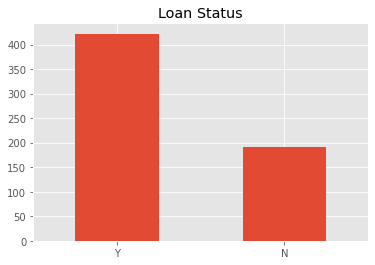

In [2592]:
plt.style.use('ggplot')
Train['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(Train['Loan_Status'].value_counts())

In [2593]:
DataSet = pd.concat([Train, Test])

In [2594]:
DataSet.drop("Loan_ID",axis=1, inplace=True)

In [2595]:
DataSet.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [2596]:
# percentage of missing "Gender" 
print('Percentage of missing "Gender" records is %.2f%%' %((DataSet['Gender'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "Gender" records is 2.45%


Number of people who take a loan group by gender :
Male      775
Female    182
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

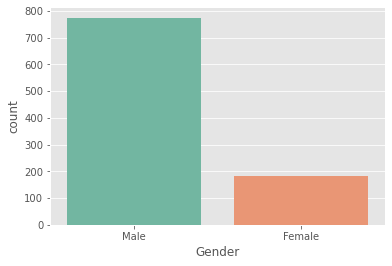

In [2597]:
print("Number of people who take a loan group by gender :")
print(DataSet['Gender'].value_counts())
sns.countplot(x='Gender', data=DataSet, palette = 'Set2')

In [2598]:
# percentage of missing "Married" 
print('Percentage of missing "Married" records is %.2f%%' %((DataSet['Married'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "Married" records is 0.31%


Number of people who take a loan group by marital status :
Yes    631
No     347
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

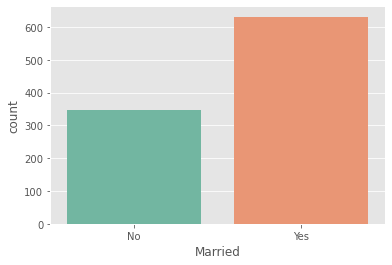

In [2599]:
print("Number of people who take a loan group by marital status :")
print(DataSet['Married'].value_counts())
sns.countplot(x='Married', data=DataSet, palette = 'Set2')

In [2600]:
# percentage of missing "Dependents" 
print('Percentage of missing "Dependents" records is %.2f%%' %((DataSet['Dependents'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "Dependents" records is 2.55%


Number of people who take a loan group by dependents :
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

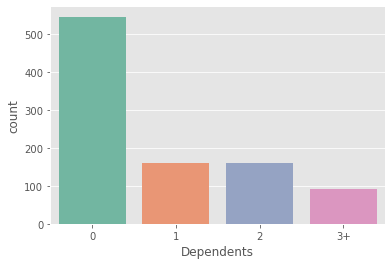

In [2601]:
print("Number of people who take a loan group by dependents :")
print(DataSet['Dependents'].value_counts())
sns.countplot(x='Dependents', data=DataSet, palette = 'Set2')

In [2602]:
# percentage of missing "Self_Employed" 
print('Percentage of missing "Self_Employed" records is %.2f%%' %((DataSet['Self_Employed'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "Self_Employed" records is 5.61%


Number of people who take a loan group by self employed :
No     807
Yes    119
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

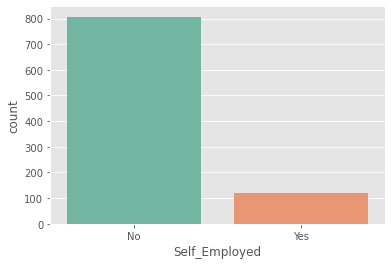

In [2603]:
print("Number of people who take a loan group by self employed :")
print(DataSet['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=DataSet, palette = 'Set2')

In [2604]:
# percentage of missing "LoanAmount" 
print('Percentage of missing "LoanAmount" records is %.2f%%' %((DataSet['LoanAmount'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "LoanAmount" records is 2.75%


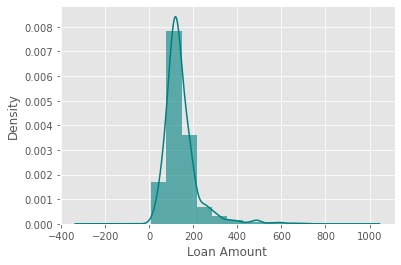

In [2605]:
ax = DataSet["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
DataSet["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

In [2606]:
# percentage of missing "Loan_Amount_Term" 
print('Percentage of missing "Loan_Amount_Term" records is %.2f%%' %((DataSet['Loan_Amount_Term'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "Loan_Amount_Term" records is 2.04%


Number of people who take a loan group by loan amount term :
360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

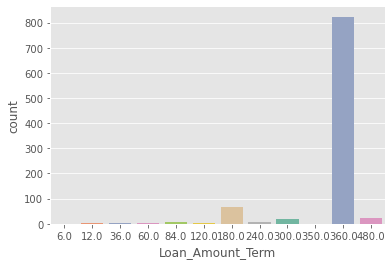

In [2607]:
print("Number of people who take a loan group by loan amount term :")
print(DataSet['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=DataSet, palette = 'Set2')

In [2608]:
# percentage of missing "Credit_History" 
print('Percentage of missing "Credit_History" records is %.2f%%' %((DataSet['Credit_History'].isnull().sum()/DataSet.shape[0])*100))

Percentage of missing "Credit_History" records is 8.05%


Number of people who take a loan group by credit history :
1.0    754
0.0    148
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

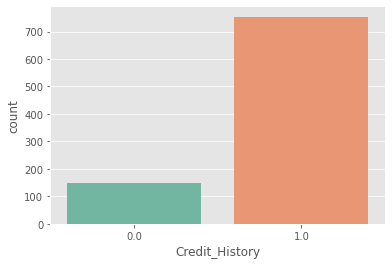

In [2609]:
print("Number of people who take a loan group by credit history :")
print(DataSet['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=DataSet, palette = 'Set2')

**Data Preprocessing** 

In [2610]:
for i in [DataSet]:
    i["Gender"] = i["Gender"].fillna(DataSet.Gender.dropna().mode()[0])
    i["Married"] = i[ "Married"].fillna(DataSet.Married.dropna().mode()[0])
    i["Dependents"]=i[ "Dependents"].fillna(DataSet.Dependents.dropna().mode()[0])
    i["Self_Employed"]=i["Self_Employed"].fillna(DataSet.Self_Employed.dropna().mode()[0])
    i["Credit_History"]=i["Credit_History"].fillna(DataSet.Credit_History.dropna().mode()[0])
    i["LoanAmount"]=i["LoanAmount"].fillna(DataSet.LoanAmount.dropna().mode()[0])
    i["Loan_Amount_Term"]=i["Loan_Amount_Term"].fillna(DataSet.Loan_Amount_Term.dropna().mode()[0])
    i["Loan_Status"]=i["Loan_Status"].fillna(DataSet.Loan_Status.dropna().mode()[0])

In [2611]:
#Check missing values
DataSet.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [2612]:
#Preview data information
DataSet.info()
DataSet.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [2519]:
Train2 = DataSet.copy()

**Mapping of categorical data**

In [2520]:
for i in [Train2]:
    i["Gender"] = i["Gender"].map({"Male":0, "Female":1}).astype(int)
    i["Married"] = i["Married"].map({'No':0, "Yes":1}).astype (int)
    i["Education"]=i["Education"].map({"Not Graduate":0, "Graduate":1}).astype(int)
    i["Self_Employed"]=i["Self_Employed"].map({'No':0,"Yes":1}).astype(int)
    i["credit_History"]=i["Credit_History"].astype(int)

In [2521]:
for i in [Train2]:
    i["Property_Area"] = i["Property_Area"].map({"Urban":0, "Rural":1, "Semiurban":2}).astype(int)
    i["Dependents"] = i["Dependents"].map({"0" :0, "1" :1,"2": 2, "3+":31})
    i["Loan_Status"] = i["Loan_Status"].map({'N':0,"Y":1}).astype(int)

In [2522]:
Train2.info()
Train2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    int64  
 12  credit_History     981 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 107.3 KB


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
credit_History       0
dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

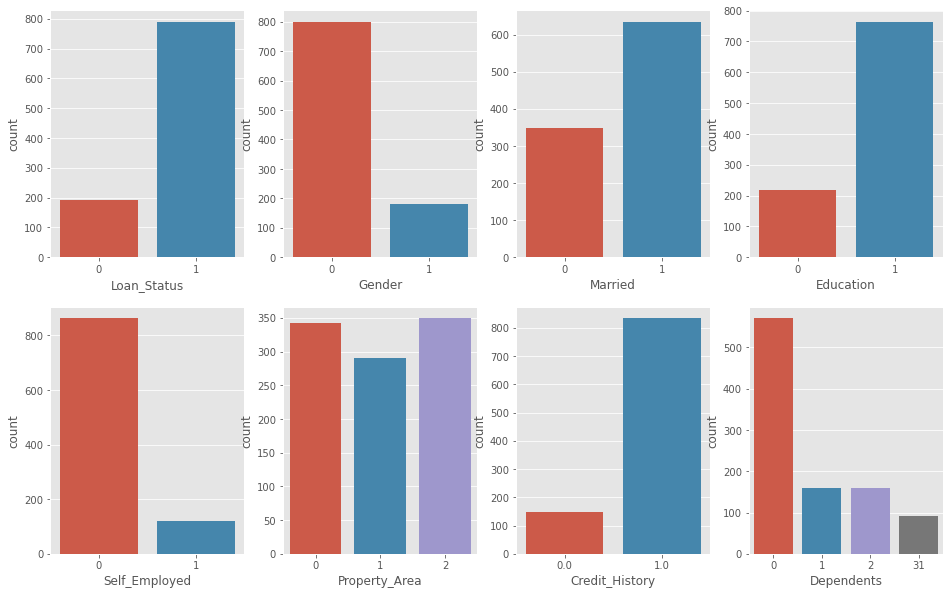

In [2523]:
# count plot

fig,ax = plt.subplots(2,4, figsize=(16,10))
sns.countplot('Loan_Status',data=Train2, ax=ax[0][0])
sns.countplot('Gender',data=Train2, ax=ax[0][1])
sns.countplot('Married',data=Train2,ax=ax[0][2])
sns.countplot('Education',data=Train2, ax=ax[0][3])
sns.countplot('Self_Employed',data=Train2, ax=ax[1][0])
sns.countplot('Property_Area', data=Train2, ax=ax[1][1])
sns.countplot('Credit_History',data=Train2, ax=ax[1][2])
sns.countplot('Dependents',data=Train2, ax=ax[1][3])

**checking for outliers**

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

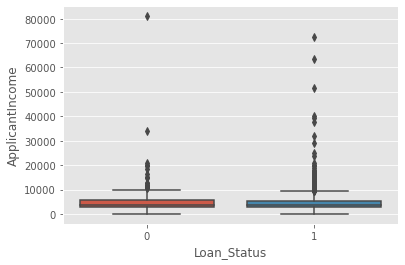

In [2524]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=Train2)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

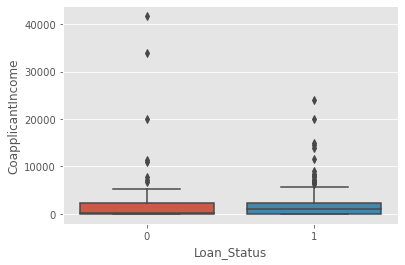

In [2525]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome',data=Train2)

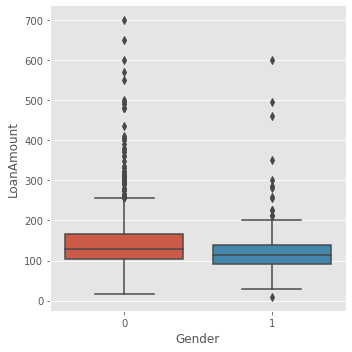

In [2526]:
sns.catplot(x='Gender',y='LoanAmount',data=Train2,kind='box')

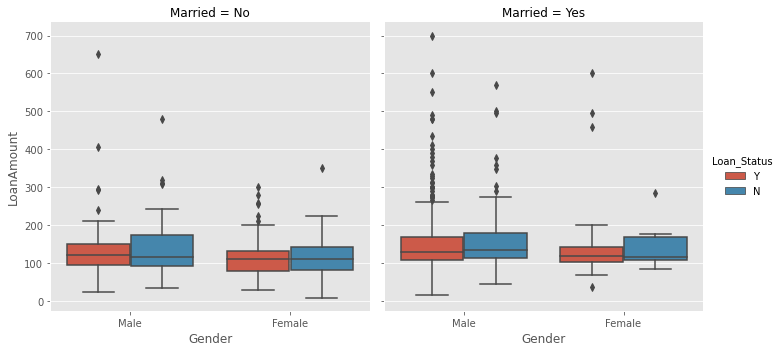

In [2527]:
sns.catplot(x='Gender',y='LoanAmount', data=DataSet, kind='box', hue='Loan_Status', col='Married')

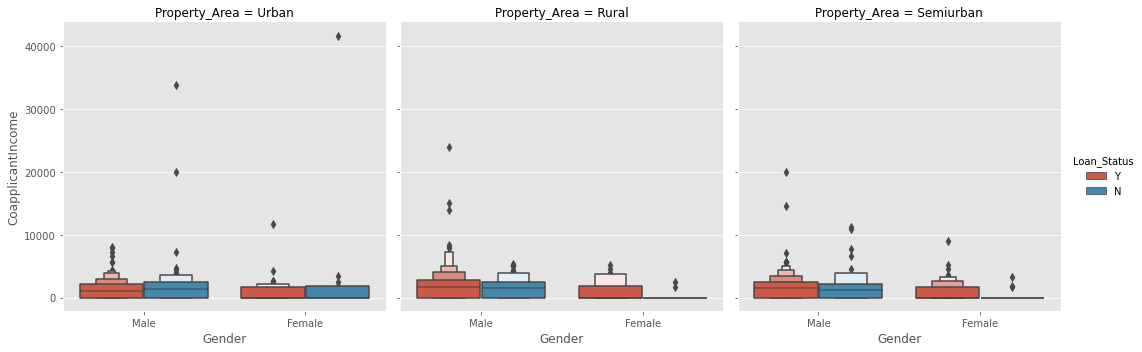

In [2528]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=DataSet, kind='boxen', hue='Loan_Status', col='Property_Area')

**checking for correlations**

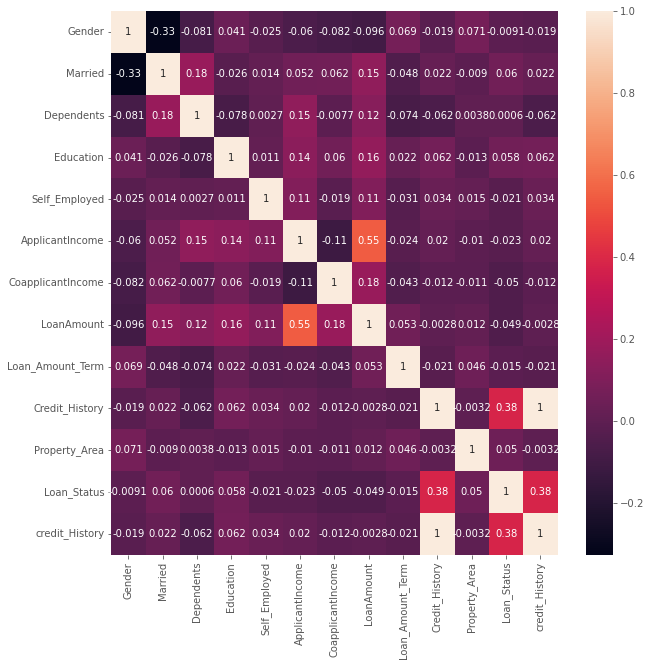

In [2529]:
plt.figure(figsize = (10,10))
correlation_matrix = Train2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [2530]:
for i in [Train2]:
    i["TotalIncome"] = i["ApplicantIncome"]+i["CoapplicantIncome"]

In [2531]:
r = 0.00833
Train2['EMI']=Train2.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term'])) / ((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)

In [2532]:
Train2['Dependents_EMI_mean']=Train2.groupby(['Dependents'])['EMI'].transform('mean')

#LoanAmount per TotalIncome
Train2['LoanAmount_per_TotalIncome']=Train2['LoanAmount']/Train2['TotalIncome' ]

# Loan Amount Term per TotalIncome
DataSet['Loan_Amount_Term_per_TotalIncome']=Train2['Loan_Amount_Term']/Train2['TotalIncome']

#EMI per Loan Amount Term
Train2['EMI _per_Loan_Amount_Term']=Train2['EMI']/Train2['Loan_Amount_Term']

#EMI per LoanAmount
Train2['EMI_per_LoanAmount']=Train2['EMI']/Train2['LoanAmount']

# Categorical variables wise mean of LoanAmount per TotalIncome
Train2['Property_Area_LoanAmount_per_TotalIncome_mean']=Train2.groupby(['Property_Area' ])['LoanAmount_per_TotalIncome'].transform('mean')

# Credit History wise sum of TotalIncome
Train2['Credit_History_Income_Sum']=Train2.groupby(['Credit_History'])['TotalIncome'].transform('sum')

# Dependents wise sum of LoanAmount
Train2['Dependents_LoanAmount_Sum']=Train2.groupby(['Dependents'])['LoanAmount']. transform('sum')

In [2533]:
from sklearn.preprocessing import KBinsDiscretizer
Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
Train2['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(Train2['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)
TotalIncome_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
Train2['TotalIncome_Bins'] = TotalIncome_discretizer.fit_transform(Train2['TotalIncome'].values.reshape(-1,1)).astype(float)
LoanAmount_per_TotalIncome_discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
Train2[ 'LoanAmount_per_TotalIncome_Bins'] = LoanAmount_per_TotalIncome_discretizer.fit_transform(Train2['LoanAmount_per_TotalIncome'].values.reshape(-1,1)).astype(float)

In [2534]:
Train2=Train2.drop(['EMI'],axis=1)
Train2=Train2.drop (['TotalIncome'],axis=1)
Train2=Train2.drop(['LoanAmount_per_TotalIncome'],axis=1)

In [2535]:
Train2.shape

(981, 22)

**Splitting of data into train and test sets

In [2536]:
X = Train2.drop("Loan_Status",axis=1)

y = Train2["Loan_Status"]

In [2537]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [2538]:
X_train.shape

(686, 21)

In [2539]:
X_test.shape

(295, 21)

#### choosing a model

In [2540]:
#Separate feature and target
X = Train2.iloc[:,1:21]
y = Train2.iloc[:,21]


#make variable for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [2541]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 90.11%


In [2542]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 82.17%


In [2543]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 86.55%


In [2544]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 63.41%


In [2545]:
clf  =  svm.LinearSVC(max_iter=100000)
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuracy of classification is %.2f%%' %(scores.mean()*100))

The accuracy of classification is 51.68%


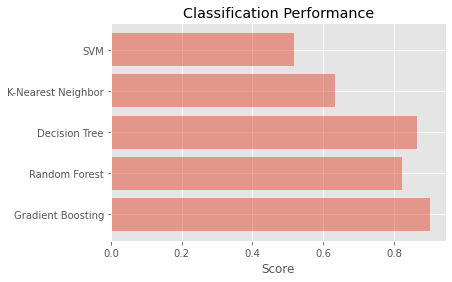

In [2546]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

In [2547]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2548]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2549]:
state = 12  
test_size = 0.30  
  
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=state)

In [2550]:
from xgboost import XGBClassifier

In [2551]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.802
Accuracy score (validation): 0.806
Learning rate:  0.075
Accuracy score (training): 0.804
Accuracy score (validation): 0.801
Learning rate:  0.1
Accuracy score (training): 0.808
Accuracy score (validation): 0.796
Learning rate:  0.25
Accuracy score (training): 0.838
Accuracy score (validation): 0.772
Learning rate:  0.5
Accuracy score (training): 0.854
Accuracy score (validation): 0.811
Learning rate:  0.75
Accuracy score (training): 0.854
Accuracy score (validation): 0.806
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.786


In [2552]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 11  29]
 [ 10 156]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.28      0.36        40
           1       0.84      0.94      0.89       166

    accuracy                           0.81       206
   macro avg       0.68      0.61      0.62       206
weighted avg       0.78      0.81      0.79       206



In [2553]:
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1])

In [2554]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

[18:17:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [2555]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.8252427184466019


In [2556]:
predict=xgb_clf.predict(X_test)

In [2557]:
predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

In [2558]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)
print(confusion_matrix)

[[ 18  22]
 [ 14 152]]


In [2559]:
# Note: Here,
# True positive is 18.
# True negative is 152.
# False positive is 22.
# False negative is 14.

In [2560]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        40
           1       0.87      0.92      0.89       166

    accuracy                           0.83       206
   macro avg       0.72      0.68      0.70       206
weighted avg       0.81      0.83      0.82       206



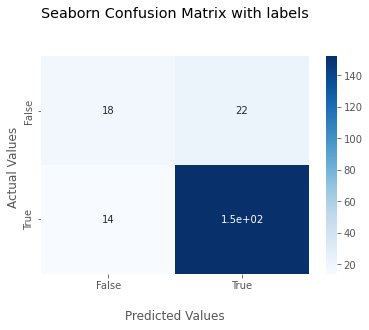

In [2561]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

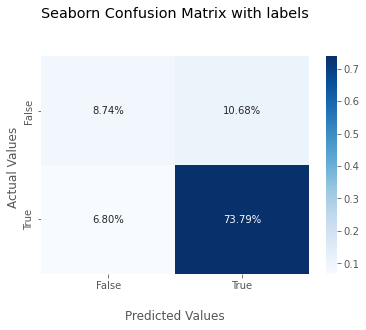

In [2562]:
ax = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [2563]:
log_clf = LogisticRegression()
cross_val_score(log_clf,X_train,y_train,cv=5)

array([0.79166667, 0.80208333, 0.82291667, 0.84375   , 0.78125   ])

In [2564]:
from sklearn.metrics import accuracy_score
pred = log_clf.fit(X_train,y_train).predict(X_test)
accuracy_score(pred,y_test)

0.8203883495145631

In [2565]:
from sklearn.model_selection import GridSearchCV
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LogisticRegression(), LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

In [2566]:
win=LR_search.predict(X_test)
accuracy_score(win,y_test)

0.8349514563106796

In [2567]:
win=LR_search.predict(X_test)

In [2568]:
win

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1])

In [2569]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, win)
print(confusion_matrix)

[[ 19  21]
 [ 13 153]]


In [2570]:
# Note: Here,
# True positive is 19.
# True negative is 153.
# False positive is 21.
# False negative is 13.

In [2571]:
from sklearn.metrics import classification_report
print(classification_report(y_test, win))

              precision    recall  f1-score   support

           0       0.59      0.47      0.53        40
           1       0.88      0.92      0.90       166

    accuracy                           0.83       206
   macro avg       0.74      0.70      0.71       206
weighted avg       0.82      0.83      0.83       206



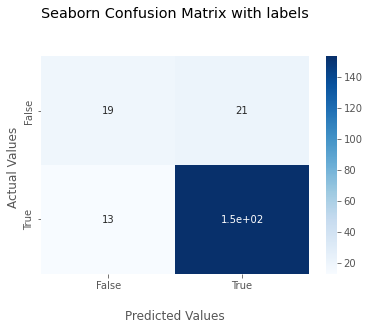

In [2572]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

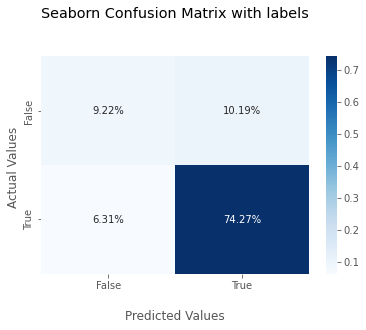

In [2573]:
ax = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [2574]:
test_df = pd.DataFrame(data = win,columns=["Loan_Status"])
final_pred = pd.concat([SS['Loan_ID'],test_df],axis=1)
final_pred['Loan_Status']=final_pred['Loan_Status'].map({1:'Y',0:'N'})
final_pred.to_csv("FinalData.csv",index=False)

In [2575]:
Final_data = pd.read_csv('FinalData.csv')

In [2576]:
Final_data.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,N
6,LP001055,Y
7,LP001056,Y
8,LP001059,Y
9,LP001067,Y


In [2577]:
Test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


#### saving the chosen model

In [2578]:
import pickle

# save the model to disk
LAP = 'FinalData.sav'
pickle.dump(LR_search, open(LAP, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(LAP, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8349514563106796


In [2579]:
import joblib

# save the model to disk
LAP = 'FinalData.sav'
joblib.dump(LR_search, LAP)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(LAP)
result = loaded_model.score(X_test, y_test)
print(result)

0.8349514563106796
